# QUESTIONS 

1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

ANS.  Suppose there is a matrix A which has dimensions (n,k)
      and matrix B has dimensions (k,m)
      
      So product of both matrix C will have (n,m) dimensions.

      therefore multiplications performed by the given matrix will be n x m x k.

      Addition will be n x m x (k-1)  

# ----------------------------------------------------------------------

2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
import numpy as np 
import time

In [2]:
def matrix(m, n):
    return [[n*i+j for j in range(n)] for i in range(m)]

In [3]:
A = matrix(100, 150)
B = matrix(150, 200)

A_np = np.array(A)
B_np = np.array(B)

In [4]:
def matrix_mul(A, B):
    if len(A[0]) != len(B):
        return None
    return [[sum(A[i][k] * B[k][j] for k in range(len(B))) for j in range(len(B[0]))] for i in range(len(A))]


C1 = matrix_mul(A, B)
print("Output of matrix multiplication using list of lists:")
for row in C1[:5]:  # Print first 5 rows for brevity
    print(row[:5])  # Print first 5 columns for brevity

C2 = np.dot(A_np, B_np)
print("Output of matrix multiplication using NumPy:")
print(C2[:5, :5]) 

Output of matrix multiplication using list of lists:
[222755000, 222766175, 222777350, 222788525, 222799700]
[558005000, 558038675, 558072350, 558106025, 558139700]
[893255000, 893311175, 893367350, 893423525, 893479700]
[1228505000, 1228583675, 1228662350, 1228741025, 1228819700]
[1563755000, 1563856175, 1563957350, 1564058525, 1564159700]
Output of matrix multiplication using NumPy:
[[ 222755000  222766175  222777350  222788525  222799700]
 [ 558005000  558038675  558072350  558106025  558139700]
 [ 893255000  893311175  893367350  893423525  893479700]
 [1228505000 1228583675 1228662350 1228741025 1228819700]
 [1563755000 1563856175 1563957350 1564058525 1564159700]]


In [5]:
# time for list of list implementation
start_time = time.time()
C1 = matrix_mul(A, B)
list_time = time.time() - start_time

# time for numpy implementation
start_time = time.time()
C2 = np.dot(A_np, B_np)
numpy_time = time.time() - start_time

In [6]:
print(f"Time taken using list of lists: {list_time:.6f} seconds")
print(f"Time taken using NumPy: {numpy_time:.6f} seconds")

if np.allclose(C1, C2):
    print("The results are the same.")
else:
    print("The results are different.")
    
if list_time < numpy_time:
    print("List of lists implementation is faster than NumPy.")
else:
    print("NumPy implementation is faster than list of lists.")

Time taken using list of lists: 0.290100 seconds
Time taken using NumPy: 0.002003 seconds
The results are different.
NumPy implementation is faster than list of lists.


# ----------------------------------------------------------------------


3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

ANS. I think the better method to implement this is to sort the elements first and then find median.

In [7]:
import numpy as np
import time

In [8]:
arr = [7, 1, 3, 2, 5, 6, 4]

# Measure time for sorting
start_time = time.time()
sorted_arr = sorted(arr)
sort_time = time.time() - start_time
print("Sorted array is", sorted_arr)
print(f"Time taken to sort the array: {sort_time:.6f} seconds")

# Measure time for finding the median manually
start_time = time.time()
n = len(sorted_arr)
if n % 2 == 1:
    median_manual = sorted_arr[n // 2]
else:
    median_manual = (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2
manual_median_time = time.time() - start_time
print("Median found manually is", median_manual)


Sorted array is [1, 2, 3, 4, 5, 6, 7]
Time taken to sort the array: 0.000000 seconds
Median found manually is 4


In [9]:
start_time = time.time()
median_numpy = np.median(sorted_arr)
numpy_median_time = time.time() - start_time
print("Median found using NumPy is", median_numpy)
print(f"Time taken to find the median using NumPy: {numpy_median_time:.6f} seconds")

# Total time taken for each method
total_manual_time = sort_time + manual_median_time
total_numpy_time = sort_time + numpy_median_time

print(f"Total time taken using manual method: {total_manual_time:.6f} seconds")
print(f"Total time taken using NumPy: {total_numpy_time:.6f} seconds")

# Comparison
if total_manual_time < total_numpy_time:
    print("Manual method is faster than NumPy.")
else:
    print("NumPy is faster than manual method.")

Median found using NumPy is 4.0
Time taken to find the median using NumPy: 0.000000 seconds
Total time taken using manual method: 0.000000 seconds
Total time taken using NumPy: 0.000000 seconds
NumPy is faster than manual method.


# ----------------------------------------------------------------------


4.  What is the gradient of the following function with respect to x and y?

$$ x^2y + y^3\sin(x) $$

ANS. 

$$
\begin{align*}
&\frac{\partial f}{\partial x} &= \frac{\partial}{\partial x} 
\\
\\ (x^2y + y^3\sin(x)) &= 2xy + y^3\cos(x) \\
\\
&\frac{\partial f}{\partial y} &= \frac{\partial}{\partial y} 
\\
\\ (x^2y + y^3\sin(x)) &= x^2 + 3y^2\sin(x)
\end{align*}
$$

# ----------------------------------------------------------------------


5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

# ----------------------------------------------------------------------


6. Use `sympy` to confirm that you obtain the same gradient analytically.

In [10]:
import sympy as sym

x, y = sym.symbols('x y')
f = (x**2)*y + (y**3)*sym.sin(x)

sym.diff(f, x), sym.diff(f, y)

(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))

# ----------------------------------------------------------------------


7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

- 1 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
    2. Branch 2
- 2 2023
    1. Branch 1
    2. Branch 2
- 3 2024
    1. Branch 1
    2. Branch 2
- 4 2025
    1. Branch 1
    2. Branch 2

In [11]:
main_dict =     {
                2022:   { 
                        "Branch 1":     {   
                                        1:      {
                                                "Roll Number": 1, 
                                                "Name": "N", 
                                                "Marks":        {  
                                                                "Maths": 100, 
                                                                "English": 70
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 2, 
                                                "Name": "M", 
                                                "Marks":        {
                                                                "Maths": 90, 
                                                                "English": 80
                                                                }
                                                }
                                        },
                        "Branch 2":     {
                                        1:      {
                                                "Roll Number": 2, 
                                                "Name": "M", 
                                                "Marks":        {
                                                                "Maths": 90, 
                                                                "English": 80
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 1, 
                                                "Name": "N", 
                                                "Marks":        {
                                                                "Maths": 100, 
                                                                "English": 70
                                                                }
                                                }
                                        }
                        },
                2023:   {
                        "Branch 1":     {
                                        1:      {
                                                "Roll Number": 3, 
                                                "Name": "O", 
                                                "Marks":        {
                                                                "Maths": 80, 
                                                                "English": 90
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 4, 
                                                "Name": "P", 
                                                "Marks":        {
                                                                "Maths": 70, 
                                                                "English": 100
                                                                }
                                                }
                                        },
                        "Branch 2":     {
                                        1:      {
                                                "Roll Number": 4, 
                                                "Name": "P", 
                                                "Marks":        {
                                                                "Maths": 70, 
                                                                "English": 100
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 3, 
                                                "Name": "O", 
                                                "Marks":        {
                                                                "Maths": 80, 
                                                                "English": 90
                                                                }
                                                }
                                        }
                        },
                2024:   {
                        "Branch 1":     {
                                        1:      {
                                                "Roll Number": 5, 
                                                "Name": "Q", 
                                                "Marks":        {
                                                                "Maths": 60, 
                                                                "English": 60
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 6, 
                                                "Name": "R", 
                                                "Marks":        {
                                                                "Maths": 50, 
                                                                "English": 50
                                                                }
                                                }
                                        },
                        "Branch 2":     {
                                        1:      {
                                                "Roll Number": 6, 
                                                "Name": "R", 
                                                "Marks":        {
                                                                "Maths": 50, 
                                                                "English": 50
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 5, 
                                                "Name": "Q", 
                                                "Marks":        {
                                                                "Maths": 60, 
                                                                "English": 60
                                                                }
                                                }
                                        }
                        },
                2025:   {
                        "Branch 1":     {
                                        1:      {
                                                "Roll Number": 7, 
                                                "Name": "S", 
                                                "Marks":        {
                                                                "Maths": 40, 
                                                                "English": 40
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 8, 
                                                "Name": "T", 
                                                "Marks":        {
                                                                "Maths": 30, 
                                                                "English": 30
                                                                }
                                                }
                                        },
                        "Branch 2":     {
                                        1:      {
                                                "Roll Number": 8, 
                                                "Name": "T", 
                                                "Marks":        {
                                                                "Maths": 30, 
                                                                "English": 30
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 7, 
                                                "Name": "S", 
                                                "Marks":        {
                                                                "Maths": 40, 
                                                                "English": 40
                                                                }
                                                }
                                        }
                        }
                }

main_dict

{2022: {'Branch 1': {1: {'Roll Number': 1,
    'Name': 'N',
    'Marks': {'Maths': 100, 'English': 70}},
   2: {'Roll Number': 2, 'Name': 'M', 'Marks': {'Maths': 90, 'English': 80}}},
  'Branch 2': {1: {'Roll Number': 2,
    'Name': 'M',
    'Marks': {'Maths': 90, 'English': 80}},
   2: {'Roll Number': 1,
    'Name': 'N',
    'Marks': {'Maths': 100, 'English': 70}}}},
 2023: {'Branch 1': {1: {'Roll Number': 3,
    'Name': 'O',
    'Marks': {'Maths': 80, 'English': 90}},
   2: {'Roll Number': 4, 'Name': 'P', 'Marks': {'Maths': 70, 'English': 100}}},
  'Branch 2': {1: {'Roll Number': 4,
    'Name': 'P',
    'Marks': {'Maths': 70, 'English': 100}},
   2: {'Roll Number': 3, 'Name': 'O', 'Marks': {'Maths': 80, 'English': 90}}}},
 2024: {'Branch 1': {1: {'Roll Number': 5,
    'Name': 'Q',
    'Marks': {'Maths': 60, 'English': 60}},
   2: {'Roll Number': 6, 'Name': 'R', 'Marks': {'Maths': 50, 'English': 50}}},
  'Branch 2': {1: {'Roll Number': 6,
    'Name': 'R',
    'Marks': {'Maths': 50, 'E

# ----------------------------------------------------------------------


8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [12]:
class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def __repr__(self):
        return f"Year({self.year}): {[branch for branch in self.branches]}"

    def add_branch(self, branch):
        self.branches.append(branch)

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def __repr__(self):
        return f"\n\t{self.name}: {[student for student in self.students]}"

    def add_student(self, student):
        self.students.append(student)

class Student:
    def __init__(self, roll, name):
        self.roll = roll
        self.name = name
        self.marks = []

    def __repr__(self):
        return f"\n\t\tRoll-Number({self.roll}), Name({self.name}): {[marks for marks in self.marks]}"

    def add_marks(self, marks):
        self.marks.append(marks)

class Marks:
    def __init__(self, subject, marks):
        self.subject = subject
        self.marks = marks

    def __repr__(self):
        return f"\n\t\t\tSubject({self.subject}): Marks({self.marks})"

def create_year(year):
    year_obj = Year(year)

    for branch in main_dict[year]:
        branch_obj = Branch(branch)

        for student in main_dict[year][branch]:
            student_obj = Student(main_dict[year][branch][student]["Roll Number"], main_dict[year][branch][student]["Name"])

            for subject in main_dict[year][branch][student]["Marks"]:
                marks_obj = Marks(subject, main_dict[year][branch][student]["Marks"][subject])
                student_obj.add_marks(marks_obj)

            branch_obj.add_student(student_obj)

        year_obj.add_branch(branch_obj)

    return year_obj

year_2022 = create_year(2022)
year_2023 = create_year(2023)
year_2024 = create_year(2024)
year_2025 = create_year(2025)

year_2022, year_2023, year_2024, year_2025

(Year(2022): [
 	Branch 1: [
 		Roll-Number(1), Name(N): [
 			Subject(Maths): Marks(100), 
 			Subject(English): Marks(70)], 
 		Roll-Number(2), Name(M): [
 			Subject(Maths): Marks(90), 
 			Subject(English): Marks(80)]], 
 	Branch 2: [
 		Roll-Number(2), Name(M): [
 			Subject(Maths): Marks(90), 
 			Subject(English): Marks(80)], 
 		Roll-Number(1), Name(N): [
 			Subject(Maths): Marks(100), 
 			Subject(English): Marks(70)]]],
 Year(2023): [
 	Branch 1: [
 		Roll-Number(3), Name(O): [
 			Subject(Maths): Marks(80), 
 			Subject(English): Marks(90)], 
 		Roll-Number(4), Name(P): [
 			Subject(Maths): Marks(70), 
 			Subject(English): Marks(100)]], 
 	Branch 2: [
 		Roll-Number(4), Name(P): [
 			Subject(Maths): Marks(70), 
 			Subject(English): Marks(100)], 
 		Roll-Number(3), Name(O): [
 			Subject(Maths): Marks(80), 
 			Subject(English): Marks(90)]]],
 Year(2024): [
 	Branch 1: [
 		Roll-Number(5), Name(Q): [
 			Subject(Maths): Marks(60), 
 			Subject(English): Marks(60)], 
 		R

# ----------------------------------------------------------------------


9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

- 1. $y = x$
- 2. $y = x^2$
- 3. $y = \frac{x^3}{100}$
- 4. $y = \sin(x)$
- 5. $y = \frac{\sin(x)}{x}$
- 6. $y = \log(x)$
- 7. $y = e^x$

In [13]:
def y1(x):
    return x

def y2(x):
    return x**2

def y3(x):
    return (x**3)/100

def y4(x):
    return np.sin(x)

def y5(x):
    return (np.sin(x))/x

def y6(x):
    return np.log(x)

def y7(x):
    return np.exp(x)

func = {1: (y1, "x"), 2: (y2, "x^2"), 3: (y3, "(x^3)/100"), 4: (y4, "sin(x)"), 5: (y5, "sin(x)/x"), 6: (y6, "log(x)"), 7: (y7, "e^x")}

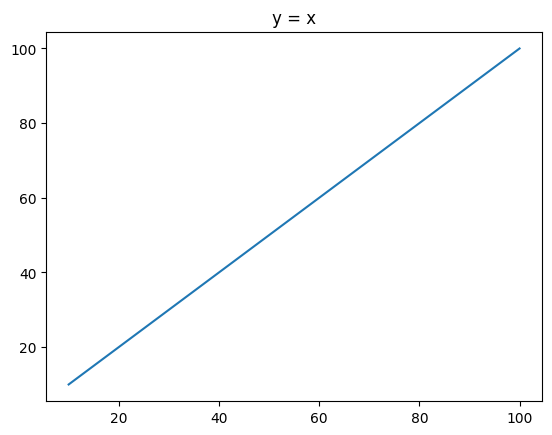

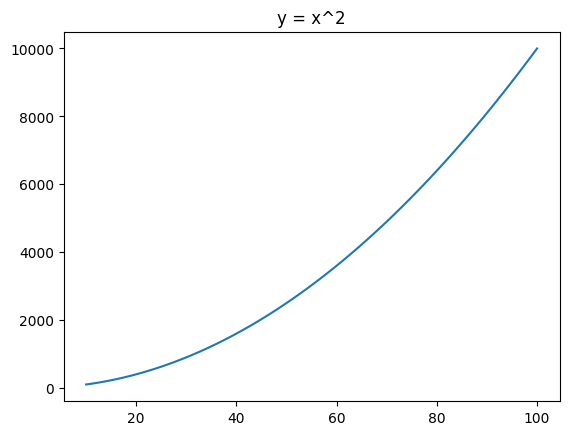

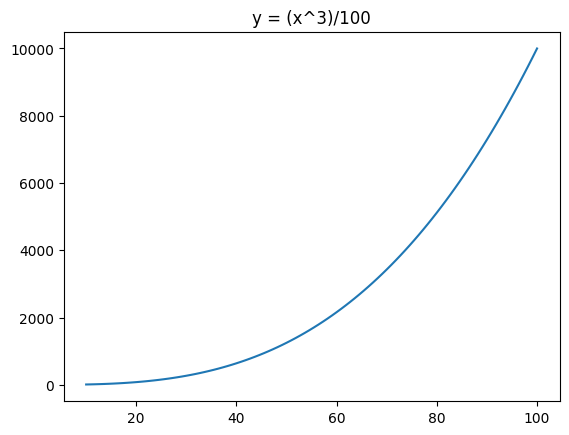

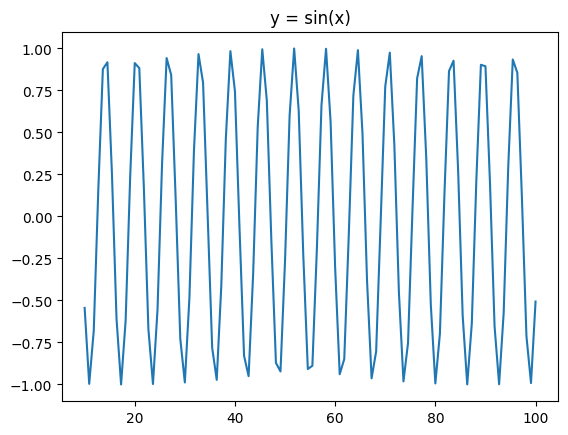

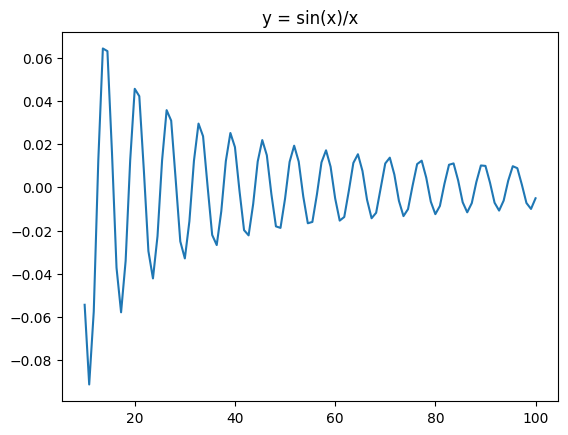

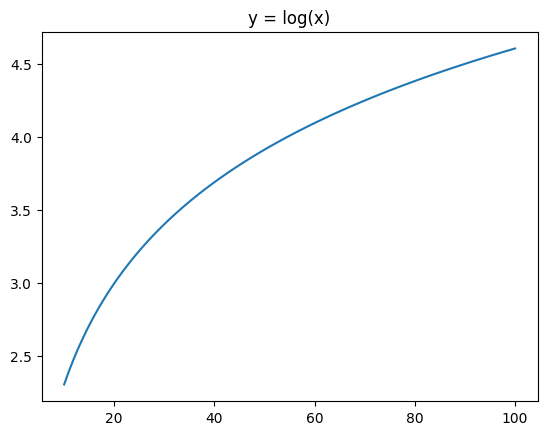

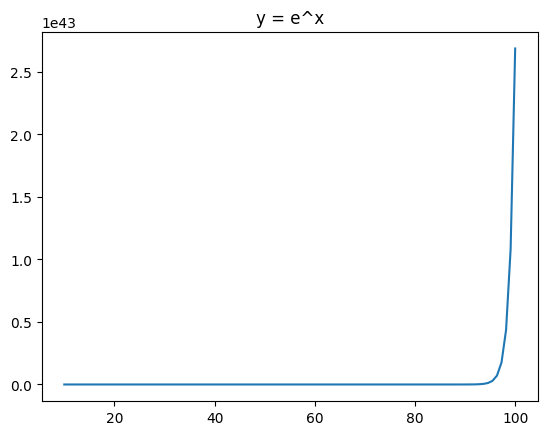

In [14]:
import matplotlib.pyplot as plt
x = np.linspace(10, 100, 100)

for i in range(1, 8):
    plt.plot(x, func[i][0](x))
    plt.title(f"y = {func[i][1]}")
    plt.show()

# ----------------------------------------------------------------------


10. Using numpy generate a matrix of size `20X5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [15]:
import pandas as pd

matrix = np.random.rand(20, 5) + 1

matrix

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

df



,a,b,c,d,e
0,1.348100,1.082937,1.966298,1.803383,1.838531
1,1.952029,1.367899,1.310907,1.701936,1.165375
2,1.016672,1.210625,1.634034,1.653365,1.177835
3,1.183332,1.475133,1.448044,1.253248,1.763142
4,1.085077,1.164902,1.429028,1.062797,1.318378
5,1.511669,1.696548,1.268949,1.623313,1.388345
6,1.689582,1.195712,1.285412,1.527286,1.984366
7,1.555271,1.862750,1.126686,1.363633,1.890169
8,1.959578,1.121436,1.867685,1.107149,1.482768
9,1.751990,1.038041,1.451810,1.666667,1.441924


In [16]:
col_max_var = df.var().idxmax()

row_min_mean = df.mean(axis=1).idxmin()

col_max_var, row_min_mean

('b', 4)

# ----------------------------------------------------------------------


11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [17]:
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]

df

,a,b,c,d,e,f
0,1.348100,1.082937,1.966298,1.803383,1.838531,8.039249
1,1.952029,1.367899,1.310907,1.701936,1.165375,7.498146
2,1.016672,1.210625,1.634034,1.653365,1.177835,6.692531
3,1.183332,1.475133,1.448044,1.253248,1.763142,7.122899
4,1.085077,1.164902,1.429028,1.062797,1.318378,6.060181
5,1.511669,1.696548,1.268949,1.623313,1.388345,7.488825
6,1.689582,1.195712,1.285412,1.527286,1.984366,7.682360
7,1.555271,1.862750,1.126686,1.363633,1.890169,7.798510
8,1.959578,1.121436,1.867685,1.107149,1.482768,7.538617
9,1.751990,1.038041,1.451810,1.666667,1.441924,7.350431


In [18]:
df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")

df

,a,b,c,d,e,f,g
0,1.348100,1.082937,1.966298,1.803383,1.838531,8.039249,GT8
1,1.952029,1.367899,1.310907,1.701936,1.165375,7.498146,LT8
2,1.016672,1.210625,1.634034,1.653365,1.177835,6.692531,LT8
3,1.183332,1.475133,1.448044,1.253248,1.763142,7.122899,LT8
4,1.085077,1.164902,1.429028,1.062797,1.318378,6.060181,LT8
5,1.511669,1.696548,1.268949,1.623313,1.388345,7.488825,LT8
6,1.689582,1.195712,1.285412,1.527286,1.984366,7.682360,LT8
7,1.555271,1.862750,1.126686,1.363633,1.890169,7.798510,LT8
8,1.959578,1.121436,1.867685,1.107149,1.482768,7.538617,LT8
9,1.751990,1.038041,1.451810,1.666667,1.441924,7.350431,LT8


In [19]:
df[df["g"] == "LT8"].shape[0], df[df["g"] == "GT8"].shape[0]

(17, 3)

In [20]:
df[df["g"] == "LT8"]["f"].std(), df[df["g"] == "GT8"]["f"].std()

(0.4825855624970909, 0.3700503886104357)

# ----------------------------------------------------------------------


12. Write a small piece of code to explain broadcasting in numpy.

ANS. NumPy has a feature called broadcasting that lets it work with arrays of various sizes. NumPy will add a scalar to each element of an array, for instance, if you add one to it. NumPy will similarly add a 1D array to each row of a 2D array when you add one to the other.

In [21]:
a = np.array([1, 2, 3, 4])
b = 3

a + b

array([4, 5, 6, 7])

In [22]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([7, 8, 9])

a + b

array([[ 8, 10, 12],
       [11, 13, 15]])

# ----------------------------------------------------------------------


13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [23]:
def argmin(n):
    if len(n) == 1:
        return 0
    m = n[0]
    idx = 0
    for i in range(1, len(n)):
        if x[i] < m:
            m = n[i]
            idx = i
    return idx

In [24]:
argmin([1, 2, 3]), np.argmin([1, 2, 3])

(0, 0)